In [2]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,auc
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
card=pd.read_csv('creditcard.csv',names=range(1,31),header=0)
card.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [36]:
card.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,-0.171685,0.203339,0.865507,0.312177,0.005481,0.190657,0.119999,-0.058113,-0.022026,0.050224,0.117868,0.250839,-0.088900,-0.225523,0.239654,-0.160426,-0.066884,-0.167119,-0.004347,0.061389,0.011604,-0.101897,-0.039030,-0.001231,0.118344,0.024121,0.026115,-0.015513,70.219940,0.039275
std,1.318935,1.195939,1.016148,1.268311,1.131878,1.249667,0.861213,0.829037,0.898050,0.990046,0.992227,0.653475,0.920275,0.833957,0.923676,0.812427,0.746671,0.774533,0.829820,0.602671,0.611495,0.609526,0.369470,0.628766,0.426891,0.468805,0.308407,0.291266,206.580833,0.194395
min,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,-2.772272,-2.332011,-2.899907,-2.656601,-6.576789,-3.618060,-3.205597,-5.400014,-2.830035,-3.463993,-2.538941,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,-0.898800,-0.174281,0.311406,-0.436612,-0.553732,-0.614206,-0.325427,-0.158631,-0.517332,-0.371568,-0.610480,-0.179960,-0.727122,-0.453929,-0.296368,-0.622523,-0.489010,-0.610648,-0.523147,-0.159742,-0.219976,-0.528998,-0.172891,-0.384998,-0.160561,-0.313283,-0.045096,-0.015094,5.975000,0.000000
50%,-0.373362,0.280917,0.894895,0.444094,-0.106432,-0.072322,0.116329,0.043828,-0.074044,-0.082880,0.008999,0.279268,-0.056143,-0.087719,0.365546,-0.075696,-0.090748,-0.171431,-0.037343,-0.014267,-0.070155,-0.072565,-0.045317,0.093423,0.145592,-0.015632,0.022920,0.023137,17.240000,0.000000
75%,1.109776,0.877703,1.505101,1.140394,0.469752,0.491334,0.567795,0.263080,0.415549,0.275905,0.974811,0.721090,0.603289,0.261158,0.896022,0.378782,0.282882,0.269069,0.490798,0.166524,0.102520,0.312472,0.073996,0.429869,0.440540,0.264540,0.114210,0.088143,57.147500,0.000000
max,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,8.821756,3.202033,2.152055,2.142710,1.642575,2.501395,1.898748,3.986289,2.606244,2.862706,7.744222,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [37]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 499
Data columns (total 30 columns):
1     662 non-null float64
2     662 non-null float64
3     662 non-null float64
4     662 non-null float64
5     662 non-null float64
6     662 non-null float64
7     662 non-null float64
8     662 non-null float64
9     662 non-null float64
10    662 non-null float64
11    662 non-null float64
12    662 non-null float64
13    662 non-null float64
14    662 non-null float64
15    662 non-null float64
16    662 non-null float64
17    662 non-null float64
18    662 non-null float64
19    662 non-null float64
20    662 non-null float64
21    662 non-null float64
22    662 non-null float64
23    662 non-null float64
24    662 non-null float64
25    662 non-null float64
26    662 non-null float64
27    662 non-null float64
28    662 non-null float64
29    662 non-null float64
30    662 non-null int64
dtypes: float64(29), int64(1)
memory usage: 160.3 KB


In [38]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',500)

In [39]:
card.columns=card.columns.astype('category')

In [40]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 499
Data columns (total 30 columns):
1     662 non-null float64
2     662 non-null float64
3     662 non-null float64
4     662 non-null float64
5     662 non-null float64
6     662 non-null float64
7     662 non-null float64
8     662 non-null float64
9     662 non-null float64
10    662 non-null float64
11    662 non-null float64
12    662 non-null float64
13    662 non-null float64
14    662 non-null float64
15    662 non-null float64
16    662 non-null float64
17    662 non-null float64
18    662 non-null float64
19    662 non-null float64
20    662 non-null float64
21    662 non-null float64
22    662 non-null float64
23    662 non-null float64
24    662 non-null float64
25    662 non-null float64
26    662 non-null float64
27    662 non-null float64
28    662 non-null float64
29    662 non-null float64
30    662 non-null int64
dtypes: float64(29), int64(1)
memory usage: 160.3 KB


In [42]:
card.rename(columns={1:'Time',29:'Amount',30:'Class'},inplace=True)
card.head()


,Time,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Amount,Class
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [48]:
X=card.iloc[:,1:28].columns

In [49]:
y=card['Class']

In [50]:
X=card[X]

In [18]:
y.shape

(662,)

In [52]:
count=card['Class'].value_counts()
print("Total count in each class\n\n",count)

Total count in each class

 0    636
1     26
Name: Class, dtype: int64


In [53]:
print("\n")

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred=lr.predict(X_test)

In [58]:
#classification Report
cr=(classification_report(y_test,y_pred))

In [59]:
#Confusion Matrix
cm=(metrics.confusion_matrix(y_test,y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

Confusion Matrix:

 [[127   1]
 [  5   0]] 



In [60]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       128
           1       0.00      0.00      0.00         5

    accuracy                           0.95       133
   macro avg       0.48      0.50      0.49       133
weighted avg       0.93      0.95      0.94       133



In [62]:
#Accuracy Score
a=(metrics.accuracy_score(y_test,y_pred))
print("Accuracy score",round(a,1))

Accuracy score 1.0


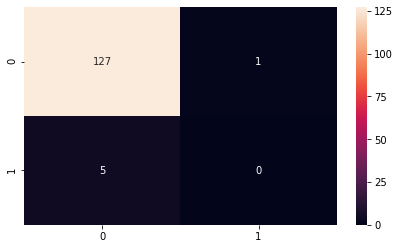

In [64]:
#heat map for confusion matrix
fig,ax=plt.subplots(figsize=(7,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [66]:
#print the actual and predicted labels
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df1.head(25))

     Actual  Predicted
241       0          0
432       0          0
346       1          0
266       0          0
190       0          0
499       0          0
375       0          0
266       0          0
227       0          0
60        0          0
52        0          0
196       0          0
322       0          0
263       0          0
411       0          0
42        0          0
38        0          0
340       0          0
140       0          0
265       0          0
73        0          0
282       0          0
439       0          0
460       0          0
409       0          0


In [68]:
#ROC curve evaluation
print("ROC Curve evaluation")
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)

ROC Curve evaluation


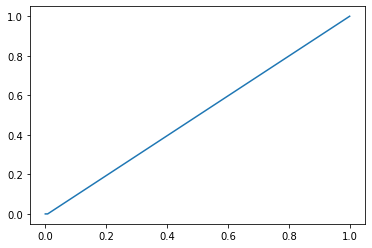

In [72]:
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="data,auc="+str(auc))
